In [ ]:
pip install kss

In [ ]:
pip install konlpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_csv('/content/올리브영 리뷰미모열일.csv', encoding ='cp949')
print(len(df))

396


In [ ]:
df.head(10)

,Unnamed: 0,평점,review
0,0,5,엘프 요정이랑 같이 구매 했습니다 처음 구매 하려고 온라인 몰을 살펴 볼 때부터도...
1,1,4,여름 쿨톤 립 제품 찾으시는 분 여름 쿨 브라이트톤 립 제품 찾으시는 분 ...
2,2,5,웜톤이 반해버린 존예탱 핑크 컬러 피부타입 아무튼 웜톤 하지만 톤 생각하지않고...
3,3,5,여름라이트톤의 쿨톤인 저는 예전에 처음 출시했던 페리페라의 미모열일 컬러를 정말 잘...
4,4,4,제 퍼스널 컬러는 여름 뮤트톤이에요 너무 쨍한 색은 어울리지 않는데 이 컬...
5,5,3,패리페라 미모열일 구매 이유 평소에 누가봐도 딱 형광핑크 느낌이 ...
6,6,5,내돈내산 미모열일 여쿨 집중 페리페라 틴트는 제가 정말 애정하는 틴트 브랜...
7,7,5,안녕하세요 오늘은 페리페라의 잉크 더 에어리벨벳 20 미모열일 제품을 만나보...
8,8,4,매장에서 테스트가 어려으너서 색깔 고를 때 고민이 많았어요 다른 분들 리뷰 발색 ...
9,9,5,엘프 요정이랑 같이 구매 했습니다 처음 구매 하려고 온라인 몰을 살펴 볼 때부터도...


In [ ]:
del (df['Unnamed: 0'],inplace = True)
df.head()

SyntaxError: ignored

In [ ]:
df.to_csv("/content/미모열일 리뷰최종"+ '.csv',
               encoding='UTF-8')

In [ ]:
import kss
a = []
s = '페리페라 잉크더 벨벳 03 만찢코랄 사용 후기 입니당 사용 계기 페리페라 립 발색은 넘나도 유명하고 예쁜 컬러가 많아서 좋아요 극강 겨울 쿨톤이라 핑크 쿨톤 계열 종류별로 하나씩 다 사서 있는데 오랜지나 웜톤 코랄 계열은 예전에 많이 쓰고 요즘은 잘 안 썼던 것 같은데 갈색으로 머리 염색하면서 코랄도 괜찮은 것 같아서 마침 세일도 해서 구매하게 되었어용 사용감 및 색감 색감은 예쁘다 못해 영롱합니다 말해뭐에 존예에요 흔치 않는 예쁜 파스텔크림 컬러라 따뜻하면서도 부드럽고 튀지 않는 은은한 색감이라 너무 이쁘고 발림성도 뷰드럽게 잘 발려용 베이스로 바르기 좋은 코랄 계열이고 사진 찍어도 다 실물 담아내기 어려워용 ㅠ 실물이 존예럽니다 만찢 코랄을 베이스로 바르고 최애쁨템을 안쪽에 발라 그라데이션 해주면 넘나 체고에용 근데 지속력이 오래 가진 않는듯 해요 ㅠ 뭐 먹고 마시고 하면 금방 사라지고 ㅠ 마스크 자주 쓰다보니 묻어니긴 해요 ㅎ 발색력 발림성응 최구입니당 요즘은 마스크 때문에 틴트를 자주 쓰다보니 지속력 좋은 걸 위주로 보게되서 ㅠ 지속력도 높아지면 좋겠네용'
for sent in kss.split_sentences(s): 
  a.append(sent)

print(a[0])

In [ ]:
# pip install kss
import kss
a = []
for i in df['review']:
  for sent in kss.split_sentences(i):
    a.append(sent)

review = pd.DataFrame(a, columns = ['review'])
review.head()

,review
0,엘프 요정이랑 같이 구매 했습니다
1,처음 구매 하려고 온라인 몰을 살펴 볼 때부터도 엘프 요정이 미모 열일보다 더 예뻐...
2,물론 이건 쿨톤인 저의개인적인 생각입니다
3,엘프 요정은 단독으로 발라도 너무 예쁩니다
4,근데 미모 열일은 단독으로 바르기에는 좀 아쉽고 엘프 요정을 기본 베이스로 바르고 ...


In [ ]:
review.to_csv("/content/미모열일 문장분리"+ '.csv',
               encoding='cp949')

In [ ]:
review = pd.DataFrame({
    '평점' : df['평점'],
    '리뷰' : a
})
print(review)

ValueError: ignored

In [ ]:
# review 열에서 중복인 내용이 있다면 중복 제거
review.drop_duplicates(subset=['review'],inplace=True)

# 정규 표현식 수행
review['review'] = review['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")

# 공백은 empty 값으로 변경
review['review'] = review['review'].str.replace("^ +","")

# 공백은 Null 값으로 변경
review['review'].replace('',np.nan,inplace=True)

# Null 값 제거
review = review.dropna(how='any')
print('전처리 후 테스트용 샘플의 개수 :',len(review))

전처리 후 테스트용 샘플의 개수 : 2692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
review.head()

,review
0,페리페라잉크더벨벳만찢코랄사용후기입니당
1,사용계기페리페라립발색은넘나도유명하고예쁜컬러가많아서좋아요
2,극강겨울쿨톤이라핑크쿨톤계열종류별로하나씩다사서있는데오랜지나웜톤코랄계열은예전에많이쓰고요...
3,말해뭐에존예에요흔치않는예쁜파스텔크림컬러라따뜻하면서도부드럽고튀지않는은은한색감이라너무이...
4,뭐먹고마시고하면금방사라지고ㅠ마스크자주쓰다보니묻어니긴해요ㅎ


In [ ]:
# 불용어 제거 
stopwords = ['의','가','이','을','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()
okt.morphs('사용 계기 페리페라 립 발색은 넘나도 유명하고 예쁜 컬러가 많아서 좋아요', stem = True)

['사용',
 '계기',
 '페리페라',
 '립',
 '발색',
 '은',
 '넘다',
 '유명하다',
 '예쁘다',
 '컬러',
 '가',
 '많다',
 '좋다']

In [ ]:
# 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 test에 저장
test = []
for sentence in tqdm(review['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    test.append(stopwords_removed_sentence)

100%|██████████| 2692/2692 [17:58<00:00,  2.50it/s]


In [ ]:
print(test[:5])

[['페리페라', '잉크', '더', '벨벳', '만', '찢다', '코랄', '사용', '후기', '이다'], ['사용', '계', '기', '페리페라', '립발색', '넘다', '유명하다', '예쁘다', '컬러', '많다', '좋다'], ['극', '강', '겨울', '쿨톤', '이라', '핑크', '쿨톤', '계', '열', '종류', '별로', '하나', '씩', '다', '사다', '오랜', '지나', '웜톤', '코랄', '계열', '예전', '많이', '쓰다', '요즘', '잘알다', '써다', '같다', '갈색', '머리', '염색', '코랄', '괜찮다', '것', '같다', '마침', '세', '일도', '구매', '하', '게', '되어다', '사', '용감', '및', '색감', '색감', '예쁘다', '영롱하다'], ['말', '뭐', '존예', '에요', '흔', '치', '않다', '예쁘다', '파스텔', '크림', '컬러', '라', '따뜻하다', '부드럽다', '튀다', '않다', '은은하다', '색감', '이라', '너무', '이쁘다', '발림', '성', '뷰', '드럽다', '자다', '발리다', '베이스', '로', '바르다', '좋다', '코랄', '계열', '이고', '사진', '찍다', '다', '실물', '담다', '어렵다', 'ㅠ', '실물', '존예', '럽', '니', '다만', '찢다', '코랄', '베이스', '로', '바르다', '최애', '쁨템', '안쪽', '발라', '그라데이션', '해주다', '넘다', '나체', '고', '용', '근데', '지속', '력', '이오', '래', '가지다', '않다', '해', '요', 'ㅠ'], ['뭐', '먹다', '말다', '금방', '사라지다', 'ㅠ', '마스크', '자주', '쓰다', '보다', '묻다', '해', '요', 'ㅎ']]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test)

print(tokenizer.word_index)

{'바르다': 1, '좋다': 2, '코랄': 3, '같다': 4, '너무': 5, '색': 6, '예쁘다': 7, '색상': 8, '페리페라': 9, '입술': 10, '제품': 11, '않다': 12, '력': 13, '틴트': 14, '로': 15, '지속': 16, '만': 17, '이다': 18, '하': 19, '구매': 20, '립': 21, '되다': 22, '느낌': 23, '컬러': 24, '보다': 25, '발림': 26, '저': 27, '이쁘다': 28, '성': 29, '있다': 30, '때': 31, '요': 32, '찢다': 33, '제': 34, '각질': 35, '쓰다': 36, '베이스': 37, '사다': 38, '매트': 39, '묻다': 40, '자다': 41, '다': 42, '어울리다': 43, '없다': 44, '진짜': 45, '벨벳': 46, '들다': 47, 'ㅠㅠ': 48, '하고': 49, '사용': 50, '발색': 51, '생각': 52, '많이': 53, '더': 54, '인데': 55, '것': 56, '이라': 57, '마스크': 58, '조금': 59, '게': 60, '해보다': 61, '아니다': 62, '정말': 63, 'ㅎㅎ': 64, '이에요': 65, '발라': 66, '착색': 67, '고': 68, '아쉽다': 69, '인': 70, '안': 71, '그': 72, '색깔': 73, '웜톤': 74, '써다': 75, '괜찮다': 76, '거': 77, '다른': 78, '발리다': 79, '부드럽다': 80, '에어리': 81, '그렇다': 82, '에서': 83, '면': 84, '부각': 85, '톤': 86, '좋아하다': 87, '한번': 88, '만족하다': 89, '마음': 90, '핑크': 91, '살짝': 92, '색도': 93, '나': 94, '건조하다': 95, '이랑': 96, '에요': 97, '촉촉하다': 98, '그냥': 99, '많다': 100, '니'

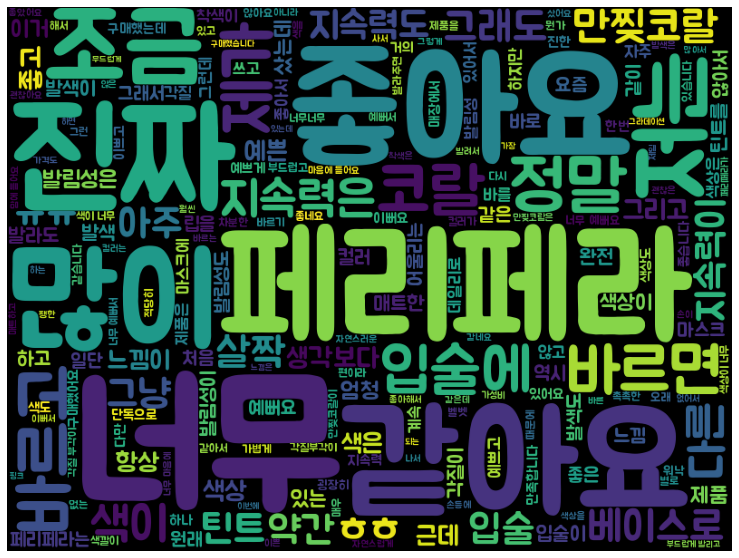

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
%matplotlib inline 

wordcloud = WordCloud(font_path='/content/sample_data/BMJUA_ttf.ttf',
                      stopwords = stopwords, 
                      background_color = 'black', #배경색 
                      width = 800, 
                      height = 600).generate(' '.join(df['리뷰'])) 
                      
plt.figure(figsize = (15, 10)) # 각각 가로 세로 인치 입니다. 
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션 
plt.imshow(wordcloud) # 이미지가 표시되도록 하는 옵션. 
plt.show() # 최종으로 보여주는 옵션.



In [ ]:
okt = Okt()
noun = okt.nouns(str(df['리뷰']))

In [ ]:
print(noun)

['페리페라', '잉크', '더', '벨벳', '만', '코랄', '사용', '후기', '사용', '봄', '웜톤', '피부', '호정', '피부', '홍조', '페리페라', '틴트', '색', '웜톤', '립', '틴트', '그', '만', '코랄', '제', '번', '손등', '보통', '립', '제품', '컬러', '가장', '요인', '에어리', '벨벳', '형', '페리페라', '나', '안', '거', '애', '은근', '도', '았', '만', '코랄', '산지', '좀', '이제', '개봉', '틴트', '어플', '리', '케이트', '솜', '솔', '그거', '발림', '지금', '쓰기', '컬러', '마음', '색', '과', '걱정', '매장', '컬러', '구매', '후', '온라인', '컬러', '추가', '구매', '색상', '색상', '만족', '색상', '리뷰']


In [ ]:
# 불용어 추가
stopwords = ['페리페라','틴트','컬러','의','가','이','을','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

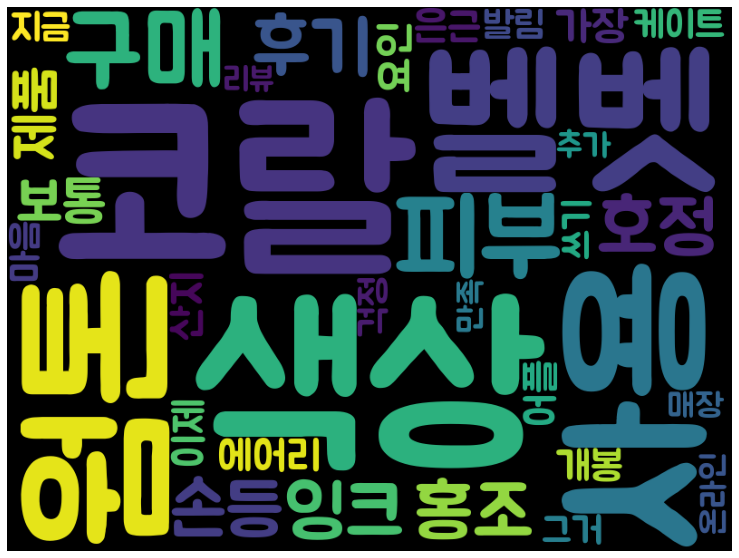

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
%matplotlib inline 

wordcloud = WordCloud(font_path='/content/sample_data/BMJUA_ttf.ttf',
                      stopwords = stopwords, 
                      background_color = 'black', #배경색 
                      width = 800, 
                      height = 600).generate(' '.join(noun)) 
                      
plt.figure(figsize = (15, 10)) # 각각 가로 세로 인치 입니다. 
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션 
plt.imshow(wordcloud) # 이미지가 표시되도록 하는 옵션. 
plt.show() # 최종으로 보여주는 옵션.



In [ ]:
from collections import Counter

'''
# 1. 이전 포스트에서 크롤링한 댓글파일을 읽기전용으로 호출함
file = open('okja1.txt','r',encoding='utf-8')
lines = file.readlines()

# 2. 변수 okja에 전체댓글을 다시저장
okja = []
for line in lines:
    okja.append(line)
file.close()
'''

# 3. 트윗터 패키지 안에 konlpy 모듈호출
from konlpy.tag import Twitter
twitter = Twitter()

# 4. 각 문장별로 형태소 구분하기
sentences_tag = []
for sentence in review['review']:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    #print(morph)
    #print('-'*30)

#print(sentences_tag)
#print(len(sentences_tag))
#print('\n'*3)

# 5. 명사 혹은 형용사인 품사만 선별해 리스트에 담기
noun_adj_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun','Adjective']:
            noun_adj_list.append(word)

# 6. 선별된 품사별 빈도수 계산 & 상위 빈도 10위 까지 출력
counts = Counter(noun_adj_list)
print(counts.most_common(20))

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('페리페라', 'Noun'), ('잉크', 'Noun'), ('더', 'Noun'), ('벨벳', 'Noun'), ('03', 'Number'), ('만', 'Noun'), ('찢', 'Verb'), ('코랄', 'Noun'), ('사용', 'Noun'), ('후기', 'Noun'), ('입니당', 'Adjective')], [('사용', 'Noun'), ('계기', 'Noun'), ('페리페라', 'Noun'), ('립', 'Noun'), ('발색', 'Noun'), ('은', 'Josa'), ('넘나도', 'Verb'), ('유명하고', 'Adjective'), ('예쁜', 'Adjective'), ('컬러', 'Noun'), ('가', 'Josa'), ('많아서', 'Adjective'), ('좋아요', 'Adjective')], [('극', 'Modifier'), ('강', 'Noun'), ('겨울', 'Noun'), ('쿨톤', 'Noun'), ('이라', 'Josa'), ('핑크', 'Noun'), ('쿨톤', 'Noun'), ('계열', 'Noun'), ('종류', 'Noun'), ('별로', 'Noun'), ('하나', 'Noun'), ('씩', 'Suffix'), ('다', 'Adverb'), ('사서', 'Noun'), ('있는데', 'Adjective'), ('오랜지', 'Noun'), ('나', 'Josa'), ('웜톤', 'Noun'), ('코랄', 'Noun'), ('계열', 'Noun'), ('은', 'Josa'), ('예전', 'Noun'), ('에', 'Josa'), ('많이', 'Adverb'), ('쓰고', 'Verb'), ('요즘', 'Noun'), ('은', 'Josa'), ('잘', 'Verb'), ('안', 'Noun'), ('썼던', 'Verb'), ('것', 'Noun'), ('같은데', 'Adjective'), ('갈색', 'Noun'), ('으로', 'Josa'), ('머리', 'Noun'), ('염색', 